#PRE ENTREGA SERGIO GIUPPONI

#Montar el Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importar librerias

In [2]:

import pandas as pd
import numpy as np
#Si quiero usar la funcion automatica que se detalla mas abajo tengo que cargar ydata
#!pip install ydata-profiling


## Cargar Datasets

In [3]:
df_clientes = pd.read_csv('/content/drive/MyDrive/datasets/clientes.csv')
df_marketing = pd.read_csv('/content/drive/MyDrive/datasets/marketing.csv')
df_ventas = pd.read_csv('/content/drive/MyDrive/datasets/ventas.csv')

#4 Analisis exploratorio basico con PANDAS

In [4]:
# Función reutilizable para Explorar un DataFrame

# Como llamar a la funcion EDA para cada dataset
#eda_dataframe(df_clientes, "df_clientes")
#eda_dataframe(df_marketing, "df_marketing")
#eda_dataframe(df_ventas, "df_ventas")




def eda_dataframe(df, nombre):
    print(f"\n=== Exploracion para {nombre} ===")

    # 1. Información básica
    print("\nForma del DataFrame (filas, columnas):", df.shape)
    print("\nTipos de datos:\n", df.dtypes)
    print("\nPrimeras 5 filas:\n", df.head())
    print("\nÚltimas 5 filas:\n", df.tail())

    # 2. Valores faltantes y duplicados
    print("\nValores faltantes por columna:\n", df.isnull().sum())
    print("Porcentaje de faltantes total: {:.2f}%".format(df.isnull().mean().mean() * 100))
    print("Filas duplicadas:", df.duplicated().sum())

    # 3. Estadísticas descriptivas
    print("\nEstadísticas numéricas:\n", df.describe(include=[np.number]))
    print("\nEstadísticas categóricas:\n", df.describe(include=[object]))

    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=[object]).columns

    # Insights preliminares automáticos
    print("\nObservaciones preliminares:")
    if df.isnull().sum().sum() > 0:
        print("- Hay datos faltantes: Considera imputar con fillna() o eliminar con dropna().")
    if df.duplicated().sum() > 0:
        print("- Duplicados detectados: Usa drop_duplicates() para limpiar.")
    if len(num_cols) > 0:
        print(f"- Columnas numéricas: {list(num_cols)}. Revisa outliers con boxplots si hay valores extremos.")
    if len(cat_cols) > 0:
        print(f"- Columnas categóricas: {list(cat_cols)}. Podrían necesitar encoding para modelado.")



# Opcional: Guardar informes en archivos
#df_clientes.describe().to_csv('eda_clientes_summary.csv')


##4 (Clientes) Info Basica de Clientes

In [5]:
eda_dataframe(df_clientes, "df_clientes")


=== Exploracion para df_clientes ===

Forma del DataFrame (filas, columnas): (567, 5)

Tipos de datos:
 id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Primeras 5 filas:
    id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65

Últimas 5 filas:
      id_cliente           nombre  edad       ciudad  ingresos
562         563    Dione Forsyde    29      Posadas  26757.73
563         564      Fleming Gow    39     Santa Fe  43674.96
564         565  Jewelle Mabbett    33      Córdoba  30522.64
565         566      Lauri Munns    23  Resistencia  31259.14
566         567      Micah

##4 (Marketing) Info Basica de Marketing

In [6]:
eda_dataframe(df_marketing, "df_marketing")


=== Exploracion para df_marketing ===

Forma del DataFrame (filas, columnas): (90, 6)

Tipos de datos:
 id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Primeras 5 filas:
    id_campanha         producto  canal  costo fecha_inicio   fecha_fin
0           74  Adorno de pared     TV   4.81   20/03/2024  03/05/2024
1           12           Tablet   RRSS   3.40   26/03/2024  13/05/2024
2           32  Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024
3           21       Smartphone   RRSS   6.37   29/03/2024  16/05/2024
4           58         Alfombra  Email   4.25   31/03/2024  05/05/2024

Últimas 5 filas:
     id_campanha            producto  canal  costo fecha_inicio   fecha_fin
85           70          Aspiradora     TV   3.06   13/12/2024  29/12/2024
86           89           Televisor     TV   4.98   13/12/2024    8/2/2025
87           68   Rincón de plantas     TV   5.

##4 (Ventas) Info Basica de Ventas

In [7]:
eda_dataframe(df_ventas, "df_ventas")


=== Exploracion para df_ventas ===

Forma del DataFrame (filas, columnas): (3035, 6)

Tipos de datos:
 id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Primeras 5 filas:
    id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  

Últimas 5 filas:
       id_venta                producto   precio  cantidad fecha_venta  \
3030      1837         Horno eléctrico  $104.12       9.0  30/12/2024   
3031      2276                

## ***Encontre goggleando una libreria para hacer el profile directamente pasando el dataset con graficos y todos los chiches de manera automatica ,solo hay que pasarle el DF ***

In [ ]:
from ydata_profiling import ProfileReport

# Generar el reporte
profile = ProfileReport(df_ventas, title="Reporte de Ventas")

# Mostrar directamente en el notebook
profile.to_notebook_iframe()

## Version simplificada del reporte

In [ ]:
profile = ProfileReport(df_ventas,
                       title="Reporte de Ventas",
                       minimal=True,  # Versión simplificada
                       explorative=False)  # Sin análisis profundo

profile.to_notebook_iframe()

# 5 Calidad de Datos Nulos y duplicados.

### Aca solamente muestra los datos Nulos y duplicados ,no los borra ni modifica

In [8]:
def nulos(df: pd.DataFrame):
    """
    Función para analizar valores nulos en los DataFrames.


    Imprime:
    - Cantidad de valores nulos por columna.
    - Porcentaje de valores nulos por columna (redondeado a 2 decimales).
    """
    print("\n📊 1. ANÁLISIS DE VALORES NULOS")
    print("-" * 60)

    # Contar valores nulos por columna
    valores_nulos = df.isna().sum()
    print("\nCantidad de valores nulos por columna:")
    print(valores_nulos)

    # Porcentaje de valores nulos
    print("\nPorcentaje de valores nulos por columna:")
    porcentaje_nulos = (df.isna().sum() / len(df)) * 100
    print(porcentaje_nulos.round(2))

In [9]:
nulos(df_ventas)
nulos(df_clientes)
nulos(df_marketing)


📊 1. ANÁLISIS DE VALORES NULOS
------------------------------------------------------------

Cantidad de valores nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Porcentaje de valores nulos por columna:
id_venta       0.00
producto       0.00
precio         0.07
cantidad       0.07
fecha_venta    0.00
categoria      0.00
dtype: float64

📊 1. ANÁLISIS DE VALORES NULOS
------------------------------------------------------------

Cantidad de valores nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Porcentaje de valores nulos por columna:
id_cliente    0.0
nombre        0.0
edad          0.0
ciudad        0.0
ingresos      0.0
dtype: float64

📊 1. ANÁLISIS DE VALORES NULOS
------------------------------------------------------------

Cantidad de valores nulos por columna:
id_campanha     0
producto        0
canal           0
costo          

In [ ]:
def duplicados(df: pd.DataFrame):
    """
    Función para analizar filas duplicadas en un DataFrame de pandas.

    Parámetros:
    - df (pd.DataFrame): El dataset a analizar.

    Imprime:
    - Cantidad de filas duplicadas.
    - Porcentaje si hay duplicados.
    - Ejemplos de filas duplicadas (primeras 15, incluyendo originales con keep=False).
    - Mensaje si no hay duplicados.
    """
    duplicados_totales = df.duplicated().sum()
    print(f"\nCantidad de filas duplicadas: {duplicados_totales}")

    if duplicados_totales > 0:
        print(f"⚠️  Se encontraron {duplicados_totales} filas duplicadas")
        print(f"   Esto representa el {(duplicados_totales / len(df) * 100):.2f}% del dataset")

        # Mostrar ejemplos de duplicados
        print("\nEjemplos de filas duplicadas:")
        print(df[df.duplicated(keep=False)].head(15))
    else:
        print("✅ No hay filas duplicadas en el dataset")

In [ ]:
duplicados(df_ventas)
duplicados(df_clientes)
duplicados(df_marketing)


Cantidad de filas duplicadas: 35
⚠️  Se encontraron 35 filas duplicadas
   Esto representa el 1.15% del dataset

Ejemplos de filas duplicadas:
     id_venta           producto   precio  cantidad fecha_venta  \
820        56           Cortinas   $66.24       5.0  05/04/2024   
821       421    Lámpara de mesa  $114.83       9.0  05/04/2024   
822       424  Jarrón decorativo   $87.94       2.0  05/04/2024   
823      1868           Cafetera   $62.23       1.0  05/04/2024   
824      2545        Auriculares   $32.81      11.0  05/04/2024   
825      2778         SmartWatch   $70.66       7.0  05/04/2024   
826        56           Cortinas   $66.24       5.0  05/04/2024   
827       421    Lámpara de mesa  $114.83       9.0  05/04/2024   
828       424  Jarrón decorativo   $87.94       2.0  05/04/2024   
829      1868           Cafetera   $62.23       1.0  05/04/2024   
830      2545        Auriculares   $32.81      11.0  05/04/2024   
831      2778         SmartWatch   $70.66       7.0 

6) Limpieza del dataset
Eliminamos duplicados.
Normalizamos texto en columnas object (trim + capitalización simple).
Convertimos fechas a fechas reales
Convertimos precio y cantidad a numéricos si existen.
Guardamos CSV limpios.

In [ ]:
# EL unico que tiene duplicados es el dataset de Ventas
# ELIMINA DUPLICADOS
print("=" * 60)
print("🧹 LIMPIEZA DE DATOS - DATASET VENTAS")
print("=" * 60)

# Guardar dimensiones originales para comparación
filas_originales = len(df_ventas)
print(f"\n📊 Dataset Original:")
print(f"   Filas: {filas_originales:,}")
print(f"   Columnas: {len(df_ventas.columns)}")

# PASO 1: ELIMINAR DUPLICADOS
print("\n" + "-" * 60)
print("PASO 1: ELIMINACIÓN DE DUPLICADOS")
print("-" * 60)

duplicados_antes = df_ventas.duplicated().sum()
print(f"Duplicados encontrados: {duplicados_antes}")

if duplicados_antes > 0:
    # Eliminar duplicados
    df = df_ventas.drop_duplicates()
    print(f"✅ Se eliminaron {duplicados_antes} filas duplicadas")
    print(f"   Filas restantes: {len(df_ventas):,}")
else:
    print("✅ No se encontraron duplicados")


🧹 LIMPIEZA DE DATOS - DATASET VENTAS

📊 Dataset Original:
   Filas: 3,035
   Columnas: 6

------------------------------------------------------------
PASO 1: ELIMINACIÓN DE DUPLICADOS
------------------------------------------------------------
Duplicados encontrados: 35
✅ Se eliminaron 35 filas duplicadas
   Filas restantes: 3,035


In [ ]:
# ELIMINA DUPLICADOS
print("=" * 60)
print("🧹 LIMPIEZA DE DATOS - DATASET VENTAS")
print("=" * 60)

# IMPORTANTE: Preservar dataset original
print("\n⚠️  NOTA: El dataset 'df_ventas' original NO será modificado")
print("   Se creará 'df_ventas_sinduplicados' para trabajo posterior\n")

# Guardar dimensiones originales para comparación
filas_originales = len(df_ventas)
print(f"\n📊 Dataset Original:")
print(f"   Filas: {filas_originales:,}")
print(f"   Columnas: {len(df_ventas.columns)}")

# PASO 1: ANÁLISIS DE DUPLICADOS
print("\n" + "-" * 60)
print("PASO 1: ANÁLISIS DE DUPLICADOS")
print("-" * 60)

duplicados_antes = df_ventas.duplicated().sum()
print(f"\nDuplicados encontrados: {duplicados_antes}")
print(f"Porcentaje: {(duplicados_antes/len(df_ventas)*100):.2f}%")

if duplicados_antes > 0:
    # Mostrar ejemplos de duplicados
    print(f"\n🔍 Ejemplos de filas duplicadas (primeras 5):")
    print(df_ventas[df_ventas.duplicated(keep=False)].head(5))

    # PASO 2: CREAR COPIA SIN DUPLICADOS
    print("\n" + "-" * 60)
    print("PASO 2: CREACIÓN DE DATASET SIN DUPLICADOS")
    print("-" * 60)

    # Crear copia limpia
    df_ventas_sinduplicados = df_ventas.drop_duplicates().reset_index(drop=True)

    filas_finales = len(df_ventas_sinduplicados)
    filas_eliminadas = filas_originales - filas_finales

    print(f"\n✅ Dataset limpio creado: 'df_ventas_sinduplicados'")
    print(f"   Filas originales (df_ventas): {filas_originales:,}")
    print(f"   Filas sin duplicados (df_ventas_sinduplicados): {filas_finales:,}")
    print(f"   Filas eliminadas: {filas_eliminadas:,} ({(filas_eliminadas/filas_originales*100):.2f}%)")

    # Guardar duplicados para auditoría (opcional)
    df_ventas_duplicados = df_ventas[df_ventas.duplicated(keep='first')]
    print(f"\n📋 Duplicados guardados para auditoría: 'df_ventas_duplicados'")
    print(f"   Cantidad: {len(df_ventas_duplicados):,} filas")

    # PASO 3: VALIDACIÓN
    print("\n" + "-" * 60)
    print("PASO 3: VALIDACIÓN POST-LIMPIEZA")
    print("-" * 60)

    duplicados_restantes = df_ventas_sinduplicados.duplicated().sum()
    print(f"\n🔍 Validación:")
    print(f"   Duplicados restantes en df_ventas_sinduplicados: {duplicados_restantes}")

    if duplicados_restantes == 0:
        print(f"   ✅ Dataset limpio correctamente - Sin duplicados")
    else:
        print(f"   ⚠️  Aún quedan {duplicados_restantes} duplicados")

else:
    print("\n✅ No se encontraron duplicados en el dataset")

    # Crear copia de todas formas para mantener consistencia
    print("\n" + "-" * 60)
    print("PASO 2: CREACIÓN DE COPIA DE TRABAJO")
    print("-" * 60)

    df_ventas_sinduplicados = df_ventas.copy()
    print(f"\n✅ Copia creada: 'df_ventas_sinduplicados'")
    print(f"   (Idéntica al original, sin duplicados para eliminar)")
    print(f"   Filas: {len(df_ventas_sinduplicados):,}")
    print(f"   Columnas: {len(df_ventas_sinduplicados.columns)}")

# RESUMEN FINAL
print("\n" + "=" * 60)
print("📊 RESUMEN DE LIMPIEZA")
print("=" * 60)

print(f"\n📁 DATASETS DISPONIBLES:")
print(f"   • df_ventas (original):           {len(df_ventas):,} filas × {len(df_ventas.columns)} columnas")
print(f"   • df_ventas_sinduplicados (limpio): {len(df_ventas_sinduplicados):,} filas × {len(df_ventas_sinduplicados.columns)} columnas")
if duplicados_antes > 0:
    print(f"   • df_ventas_duplicados (auditoría): {len(df_ventas_duplicados):,} filas")

print(f"\n💾 Memoria utilizada:")
print(f"   • df_ventas: {df_ventas.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • df_ventas_sinduplicados: {df_ventas_sinduplicados.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🧹 Acciones realizadas:")
if duplicados_antes > 0:
    print(f"   ✅ Duplicados eliminados: {duplicados_antes:,}")
    print(f"   ✅ Dataset limpio creado: df_ventas_sinduplicados")
    print(f"   ✅ Dataset original preservado: df_ventas")
    print(f"   ✅ Duplicados guardados para auditoría: df_ventas_duplicados")
else:
    print(f"   ✅ No había duplicados para eliminar")
    print(f"   ✅ Copia de trabajo creada: df_ventas_sinduplicados")

print(f"\n💡 PRÓXIMOS PASOS:")
print(f"   → Usar 'df_ventas_sinduplicados' para análisis y transformaciones")
print(f"   → Mantener 'df_ventas' como respaldo del dataset original")
if duplicados_antes > 0:
    print(f"   → Revisar 'df_ventas_duplicados' si necesitas auditar lo eliminado")

print("\n" + "=" * 60)
print("✅ Limpieza de duplicados completada")
print("=" * 60)

# Vista previa del dataset limpio
print("\n👀 Vista previa de df_ventas_sinduplicados:")
print(df_ventas_sinduplicados.head())

🧹 LIMPIEZA DE DATOS - DATASET VENTAS

⚠️  NOTA: El dataset 'df_ventas' original NO será modificado
   Se creará 'df_ventas_sinduplicados' para trabajo posterior


📊 Dataset Original:
   Filas: 3,035
   Columnas: 6

------------------------------------------------------------
PASO 1: ANÁLISIS DE DUPLICADOS
------------------------------------------------------------

Duplicados encontrados: 35
Porcentaje: 1.15%

🔍 Ejemplos de filas duplicadas (primeras 5):
     id_venta           producto   precio  cantidad fecha_venta  \
820        56           Cortinas   $66.24       5.0  05/04/2024   
821       421    Lámpara de mesa  $114.83       9.0  05/04/2024   
822       424  Jarrón decorativo   $87.94       2.0  05/04/2024   
823      1868           Cafetera   $62.23       1.0  05/04/2024   
824      2545        Auriculares   $32.81      11.0  05/04/2024   

             categoria  
820         Decoración  
821         Decoración  
822         Decoración  
823  Electrodomésticos  
824        E

In [ ]:
import re
#LIMPIEZA DEL DATASET

def limpiar_dataset(df: pd.DataFrame, eliminar_duplicados: bool = True, columnas_numericas_a_limpiar: dict = None, normalizacion_texto: str = None):
    """
    Función completa para limpiar un dataset en pandas, incluyendo:
    - Limpieza de columnas de texto (strip, espacios múltiples, caracteres especiales).
    - Limpieza opcional de columnas numéricas disfrazadas de texto.
    - Verificación de nulos post-limpieza.
    - Reinicio de índice.
    - Resumen final con estadísticas.

    Parámetros:
    - df (pd.DataFrame): El dataset a limpiar (se modifica in-place).
    - eliminar_duplicados (bool): Si True, elimina filas duplicadas antes de la limpieza (default: True).
    - columnas_numericas_a_limpiar (dict): Diccionario con columnas a convertir a numérico y patrones a reemplazar.
      Ejemplo: {'precio': ['$', ','], 'cantidad': ['[^0-9]']}.
      Para cada columna, proporciona una lista de patrones regex o strings a reemplazar (replace con '' por default).
    - normalizacion_texto (str): Opcional, 'lower', 'upper' o 'title' para normalizar caso en texto.

    Retorna:
    - df_limpio (pd.DataFrame): El DataFrame limpio.
    - resumen (dict): Diccionario con estadísticas de la limpieza.
    """
    if columnas_numericas_a_limpiar is None:
        columnas_numericas_a_limpiar = {}

    filas_originales = len(df)
    duplicados_antes = df.duplicated().sum()

    print("\n" + "-" * 60)
    print("INICIO DE LIMPIEZA DEL DATASET")
    print("-" * 60)

    # Opcional: Eliminar duplicados al inicio
    if eliminar_duplicados and duplicados_antes > 0:
        print(f"\nEliminando {duplicados_antes} filas duplicadas al inicio...")
        df = df.drop_duplicates().reset_index(drop=True)
        print("✅ Duplicados eliminados")

    # PASO 2: LIMPIAR COLUMNAS DE TEXTO
    print("\n" + "-" * 60)
    print("PASO 2: LIMPIEZA DE COLUMNAS DE TEXTO")
    print("-" * 60)

    # Identificar columnas de texto (tipo object)
    columnas_texto = df.select_dtypes(include=['object']).columns
    print(f"\nColumnas de texto encontradas: {len(columnas_texto)}")
    print(f"Columnas: {list(columnas_texto)}")

    # Aplicar limpieza a cada columna de texto
    for columna in columnas_texto:
        print(f"\n🔍 Limpiando columna: '{columna}'")

        # Mostrar ejemplos antes de limpiar
        print(f"   Ejemplos antes: {df[columna].head(3).tolist()}")

        # Asegurarse de que sea string
        df[columna] = df[columna].astype(str)

        # 1. Eliminar espacios al inicio y final
        df[columna] = df[columna].str.strip()

        # 2. Eliminar espacios múltiples entre palabras
        df[columna] = df[columna].str.replace(r'\s+', ' ', regex=True)

        # 3. Eliminar caracteres especiales comunes no deseados listado con regex
        df[columna] = df[columna].str.replace(r'[^\w\s\-.,@áéíóúÁÉÍÓÚñÑ]', '', regex=True)

        # 4. Normalizar mayúsculas/minúsculas (opcional)
        if normalizacion_texto == 'lower':
            df[columna] = df[columna].str.lower()
        elif normalizacion_texto == 'upper':
            df[columna] = df[columna].str.upper()
        elif normalizacion_texto == 'title':
            df[columna] = df[columna].str.title()

        print(f"   Ejemplos después: {df[columna].head(3).tolist()}")
        print(f"   ✅ Limpieza completada")

    # PASO 3: LIMPIAR COLUMNAS NUMÉRICAS (si tienen formato de texto)
    print("\n" + "-" * 60)
    print("PASO 3: LIMPIEZA DE COLUMNAS NUMÉRICAS")
    print("-" * 60)

    if columnas_numericas_a_limpiar:
        for col, patrones in columnas_numericas_a_limpiar.items():
            if col in df.columns:
                print(f"\n🔍 Limpiando columna '{col}'")
                for patron in patrones:
                    df[col] = df[col].astype(str).str.replace(patron, '', regex=True)
                df[col] = pd.to_numeric(df[col], errors='coerce')
                print(f"   ✅ Columna '{col}' convertida a numérico")
    else:
        print("\nNo se especificaron columnas numéricas para limpiar.")

    print("\n✅ Limpieza de columnas numéricas completada")

    # PASO 4: VERIFICAR Y LIMPIAR VALORES NULOS GENERADOS
    print("\n" + "-" * 60)
    print("PASO 4: VERIFICACIÓN DE VALORES NULOS POST-LIMPIEZA")
    print("-" * 60)

    nulos_post_limpieza = df.isna().sum()
    if nulos_post_limpieza.sum() > 0:
        print("\n⚠️  Se generaron algunos valores nulos durante la limpieza:")
        print(nulos_post_limpieza[nulos_post_limpieza > 0])
        print("\n   Opciones sugeridas:")
        print("   - Eliminar filas con nulos: df.dropna()")
        print("   - Rellenar con valores: df.fillna(valor)")
    else:
        print("✅ No se generaron valores nulos durante la limpieza")

    # PASO 5: REINICIAR ÍNDICE
    print("\n" + "-" * 60)
    print("PASO 5: REINICIO DE ÍNDICE")
    print("-" * 60)

    df = df.reset_index(drop=True)
    print("✅ Índice reiniciado correctamente")

    # RESUMEN FINAL
    print("\n" + "=" * 60)
    print("📊 RESUMEN DE LIMPIEZA")
    print("=" * 60)

    filas_finales = len(df)
    filas_eliminadas = filas_originales - filas_finales

    print(f"\n📈 Estadísticas:")
    print(f"   Filas originales: {filas_originales:,}")
    print(f"   Filas finales: {filas_finales:,}")
    print(f"   Filas eliminadas: {filas_eliminadas:,} ({(filas_eliminadas / filas_originales * 100):.2f}% si > 0 else '0.00%')")
    print(f"   Columnas: {len(df.columns)}")

    print(f"\n🧹 Acciones realizadas:")
    print(f"   ✅ Duplicados eliminados: {duplicados_antes}")
    print(f"   ✅ Columnas de texto limpiadas: {len(columnas_texto)}")
    print(f"   ✅ Espacios y caracteres especiales eliminados")
    print(f"   ✅ Índice reiniciado")

    print(f"\n💾 Dataset limpio listo para análisis")

    # Mostrar primeras filas del dataset limpio
    print("\n" + "=" * 60)
    print("Vista previa del dataset limpio:")
    print("=" * 60)
    print(df.head())

    # Información del dataset limpio
    print("\n" + "=" * 60)
    print("Información del dataset limpio:")
    print("=" * 60)
    df.info()

    # Retornar resultados
    resumen = {
        'filas_originales': filas_originales,
        'filas_finales': filas_finales,
        'filas_eliminadas': filas_eliminadas,
        'duplicados_eliminados': duplicados_antes,
        'columnas_texto_limpiadas': len(columnas_texto),
        'nulos_post_limpieza': nulos_post_limpieza.to_dict()
    }
    return df, resumen

In [ ]:
limpiar_dataset(df_ventas_sinduplicados, eliminar_duplicados=True, columnas_numericas_a_limpiar=None, normalizacion_texto=None)


------------------------------------------------------------
INICIO DE LIMPIEZA DEL DATASET
------------------------------------------------------------

------------------------------------------------------------
PASO 2: LIMPIEZA DE COLUMNAS DE TEXTO
------------------------------------------------------------

Columnas de texto encontradas: 4
Columnas: ['producto', 'precio', 'fecha_venta', 'categoria']

🔍 Limpiando columna: 'producto'
   Ejemplos antes: ['Cuadro decorativo', 'Lámpara de mesa', 'Secadora']
   Ejemplos después: ['Cuadro decorativo', 'Lámpara de mesa', 'Secadora']
   ✅ Limpieza completada

🔍 Limpiando columna: 'precio'
   Ejemplos antes: ['69.94', '105.10', '97.96']
   Ejemplos después: ['69.94', '105.10', '97.96']
   ✅ Limpieza completada

🔍 Limpiando columna: 'fecha_venta'
   Ejemplos antes: ['02012024', '02012024', '02012024']
   Ejemplos después: ['02012024', '02012024', '02012024']
   ✅ Limpieza completada

🔍 Limpiando columna: 'categoria'
   Ejemplos antes: ['De

(      id_venta                producto  precio  cantidad fecha_venta  \
 0          792       Cuadro decorativo   69.94       5.0    02012024   
 1          811         Lámpara de mesa  105.10       5.0    02012024   
 2         1156                Secadora   97.96       3.0    02012024   
 3         1372                Heladera  114.35       8.0    02012024   
 4         1546                Secadora  106.21       4.0    02012024   
 ...        ...                     ...     ...       ...         ...   
 2995      1837         Horno eléctrico  104.12       9.0    30122024   
 2996      2276                  Laptop   85.27       9.0    30122024   
 2997      2696                  Laptop  107.81       4.0    30122024   
 2998      2913              Smartphone   99.85       7.0    30122024   
 2999      2930  Consola de videojuegos   55.47       6.0    30122024   
 
               categoria  
 0            Decoración  
 1            Decoración  
 2     Electrodomésticos  
 3     Electro

In [11]:
#import pandas as pd
import re

def limpiar_dataset(df: pd.DataFrame,
                   eliminar_duplicados: bool = True,
                   columnas_numericas_a_limpiar: dict = None,
                   normalizacion_texto: str = None,
                   columna_fecha: str = None,
                   formato_fecha: str = None):
    """
    Función completa para limpiar un dataset en pandas, incluyendo:
    - Limpieza de columnas de texto (strip, espacios múltiples, caracteres especiales).
    - Limpieza opcional de columnas numéricas disfrazadas de texto.
    - Conversión de campo fecha a formato datetime (con soporte para formato latinoamericano).
    - Verificación de nulos post-limpieza.
    - Reinicio de índice.
    - Resumen final con estadísticas.

    Parámetros:
    - df (pd.DataFrame): El dataset a limpiar (se modifica in-place).
    - eliminar_duplicados (bool): Si True, elimina filas duplicadas antes de la limpieza (default: True).
    - columnas_numericas_a_limpiar (dict): Diccionario con columnas a convertir a numérico y patrones a reemplazar.
      Ejemplo: {'precio': ['$', ','], 'cantidad': ['[^0-9]']}.
    - normalizacion_texto (str): Opcional, 'lower', 'upper' o 'title' para normalizar caso en texto.
    - columna_fecha (str): Nombre de la columna de fecha a convertir (opcional).
    - formato_fecha (str): Formato específico de fecha, ej: '%d/%m/%Y'. Si None, intenta detección automática con dayfirst=True.

    Retorna:
    - df_limpio (pd.DataFrame): El DataFrame limpio.
    - resumen (dict): Diccionario con estadísticas de la limpieza.
    """
    if columnas_numericas_a_limpiar is None:
        columnas_numericas_a_limpiar = {}

    filas_originales = len(df)
    duplicados_antes = df.duplicated().sum()

    print("\n" + "-" * 60)
    print("INICIO DE LIMPIEZA DEL DATASET")
    print("-" * 60)

    # PASO 1: Eliminar duplicados al inicio
    if eliminar_duplicados and duplicados_antes > 0:
        print(f"\nEliminando {duplicados_antes} filas duplicadas al inicio...")
        df = df.drop_duplicates().reset_index(drop=True)
        print("✅ Duplicados eliminados")

    # PASO 2: CONVERTIR CAMPO FECHA
    fechas_invalidas = 0
    if columna_fecha and columna_fecha in df.columns:
        print("\n" + "-" * 60)
        print("PASO 2: CONVERSIÓN DE CAMPO FECHA")
        print("-" * 60)

        print(f"\n🔍 Procesando columna: '{columna_fecha}'")
        print(f"   Tipo original: {df[columna_fecha].dtype}")
        print(f"   Ejemplos antes: {df[columna_fecha].head(3).tolist()}")

        try:
            if formato_fecha:
                # Usar formato específico
                df[columna_fecha] = pd.to_datetime(df[columna_fecha],
                                                   format=formato_fecha,
                                                   errors='coerce')
                print(f"   ✅ Conversión con formato específico: {formato_fecha}")
            else:
                # Detección automática con formato latinoamericano (día primero)
                df[columna_fecha] = pd.to_datetime(df[columna_fecha],
                                                   dayfirst=True,  # Formato latinoamericano
                                                   errors='coerce')
                print(f"   ✅ Conversión automática (formato latinoamericano: DD/MM/YYYY)")

            # Verificar fechas inválidas
            fechas_invalidas = df[columna_fecha].isna().sum()

            if fechas_invalidas > 0:
                print(f"   ⚠️  {fechas_invalidas} fechas inválidas detectadas ({(fechas_invalidas/len(df)*100):.2f}%)")
            else:
                print(f"   ✅ Todas las fechas convertidas exitosamente")

            print(f"   Tipo después: {df[columna_fecha].dtype}")
            print(f"   Ejemplos después: {df[columna_fecha].head(3).tolist()}")

            # Extraer componentes de fecha
            if df[columna_fecha].dtype == 'datetime64[ns]':
                df['año'] = df[columna_fecha].dt.year
                df['mes'] = df[columna_fecha].dt.month
                df['dia'] = df[columna_fecha].dt.day
                df['trimestre'] = df[columna_fecha].dt.quarter
                df['nombre_mes'] = df[columna_fecha].dt.month_name()
                df['dia_semana'] = df[columna_fecha].dt.day_name()

                print(f"\n   📅 Componentes extraídos:")
                print(f"      - año, mes, dia, trimestre")
                print(f"      - nombre_mes, dia_semana")

                # Estadísticas de fechas
                print(f"\n   📊 Rango de fechas:")
                print(f"      Fecha mínima: {df[columna_fecha].min()}")
                print(f"      Fecha máxima: {df[columna_fecha].max()}")

        except Exception as e:
            print(f"   ❌ Error en conversión de fecha: {e}")
    elif columna_fecha:
        print(f"\n⚠️  ADVERTENCIA: La columna '{columna_fecha}' no existe en el dataset")

    # PASO 3: LIMPIAR COLUMNAS DE TEXTO
    print("\n" + "-" * 60)
    print("PASO 3: LIMPIEZA DE COLUMNAS DE TEXTO")
    print("-" * 60)

    # Identificar columnas de texto (tipo object), excluyendo la de fecha si ya fue convertida
    columnas_texto = df.select_dtypes(include=['object']).columns
    print(f"\nColumnas de texto encontradas: {len(columnas_texto)}")
    print(f"Columnas: {list(columnas_texto)}")

    # Aplicar limpieza a cada columna de texto
    for columna in columnas_texto:
        print(f"\n🔍 Limpiando columna: '{columna}'")

        # Mostrar ejemplos antes de limpiar
        print(f"   Ejemplos antes: {df[columna].head(3).tolist()}")

        # Asegurarse de que sea string
        df[columna] = df[columna].astype(str)

        # 1. Eliminar espacios al inicio y final
        df[columna] = df[columna].str.strip()

        # 2. Eliminar espacios múltiples entre palabras
        df[columna] = df[columna].str.replace(r'\s+', ' ', regex=True)

        # 3. Eliminar caracteres especiales comunes no deseados
        df[columna] = df[columna].str.replace(r'[^\w\s\-.,@áéíóúÁÉÍÓÚñÑ]', '', regex=True)

        # 4. Normalizar mayúsculas/minúsculas (opcional)
        if normalizacion_texto == 'lower':
            df[columna] = df[columna].str.lower()
        elif normalizacion_texto == 'upper':
            df[columna] = df[columna].str.upper()
        elif normalizacion_texto == 'title':
            df[columna] = df[columna].str.title()

        print(f"   Ejemplos después: {df[columna].head(3).tolist()}")
        print(f"   ✅ Limpieza completada")

    # PASO 4: LIMPIAR COLUMNAS NUMÉRICAS (si tienen formato de texto)
    print("\n" + "-" * 60)
    print("PASO 4: LIMPIEZA DE COLUMNAS NUMÉRICAS")
    print("-" * 60)

    if columnas_numericas_a_limpiar:
        for col, patrones in columnas_numericas_a_limpiar.items():
            if col in df.columns:
                print(f"\n🔍 Limpiando columna '{col}'")
                for patron in patrones:
                    df[col] = df[col].astype(str).str.replace(patron, '', regex=True)
                df[col] = pd.to_numeric(df[col], errors='coerce')
                print(f"   ✅ Columna '{col}' convertida a numérico")
    else:
        print("\nNo se especificaron columnas numéricas para limpiar.")

    print("\n✅ Limpieza de columnas numéricas completada")

    # PASO 5: VERIFICAR Y LIMPIAR VALORES NULOS GENERADOS
    print("\n" + "-" * 60)
    print("PASO 5: VERIFICACIÓN DE VALORES NULOS POST-LIMPIEZA")
    print("-" * 60)

    nulos_post_limpieza = df.isna().sum()
    if nulos_post_limpieza.sum() > 0:
        print("\n⚠️  Se generaron algunos valores nulos durante la limpieza:")
        print(nulos_post_limpieza[nulos_post_limpieza > 0])
        print("\n   Opciones sugeridas:")
        print("   - Eliminar filas con nulos: df.dropna()")
        print("   - Rellenar con valores: df.fillna(valor)")
    else:
        print("✅ No se generaron valores nulos durante la limpieza")

    # PASO 6: REINICIAR ÍNDICE
    print("\n" + "-" * 60)
    print("PASO 6: REINICIO DE ÍNDICE")
    print("-" * 60)

    df = df.reset_index(drop=True)
    print("✅ Índice reiniciado correctamente")

    # RESUMEN FINAL
    print("\n" + "=" * 60)
    print("📊 RESUMEN DE LIMPIEZA")
    print("=" * 60)

    filas_finales = len(df)
    filas_eliminadas = filas_originales - filas_finales

    print(f"\n📈 Estadísticas:")
    print(f"   Filas originales: {filas_originales:,}")
    print(f"   Filas finales: {filas_finales:,}")
    print(f"   Filas eliminadas: {filas_eliminadas:,} ({(filas_eliminadas / filas_originales * 100):.2f}%)")
    print(f"   Columnas: {len(df.columns)}")

    print(f"\n🧹 Acciones realizadas:")
    print(f"   ✅ Duplicados eliminados: {duplicados_antes}")
    if columna_fecha and columna_fecha in df.columns:
        print(f"   ✅ Campo fecha convertido: {columna_fecha} ({fechas_invalidas} inválidas)")
    print(f"   ✅ Columnas de texto limpiadas: {len(columnas_texto)}")
    print(f"   ✅ Espacios y caracteres especiales eliminados")
    print(f"   ✅ Índice reiniciado")

    print(f"\n💾 Dataset limpio listo para análisis")

    # Mostrar primeras filas del dataset limpio
    print("\n" + "=" * 60)
    print("Vista previa del dataset limpio:")
    print("=" * 60)
    print(df.head())

    # Información del dataset limpio
    print("\n" + "=" * 60)
    print("Información del dataset limpio:")
    print("=" * 60)
    df.info()

    # Retornar resultados
    resumen = {
        'filas_originales': filas_originales,
        'filas_finales': filas_finales,
        'filas_eliminadas': filas_eliminadas,
        'duplicados_eliminados': duplicados_antes,
        'columnas_texto_limpiadas': len(columnas_texto),
        'fecha_convertida': columna_fecha if columna_fecha else None,
        'fechas_invalidas': fechas_invalidas,
        'nulos_post_limpieza': nulos_post_limpieza.to_dict()
    }
    return df, resumen


# EJEMPLO DE USO:
"""
# Ejemplo 1: Limpieza básica con conversión de fecha automática (formato latinoamericano)
df_limpio, resumen = limpiar_dataset(
    df,
    eliminar_duplicados=True,
    columna_fecha='fecha'  # Detecta automáticamente formato DD/MM/YYYY
)

# Ejemplo 2: Con formato de fecha específico
df_limpio, resumen = limpiar_dataset(
    df,
    eliminar_duplicados=True,
    columna_fecha='fecha',
    formato_fecha='%d/%m/%Y'  # Formato explícito: 15/01/2024
)

# Ejemplo 3: Limpieza completa con todos los parámetros
df_limpio, resumen = limpiar_dataset(
    df,
    eliminar_duplicados=True,
    columnas_numericas_a_limpiar={'precio': ['$', ','], 'cantidad': ['[^0-9]']},
    normalizacion_texto='lower',
    columna_fecha='fecha',
    formato_fecha='%d/%m/%Y'
)

# Ver el resumen
print(resumen)
"""

"\n# Ejemplo 1: Limpieza básica con conversión de fecha automática (formato latinoamericano)\ndf_limpio, resumen = limpiar_dataset(\n    df,\n    eliminar_duplicados=True,\n    columna_fecha='fecha'  # Detecta automáticamente formato DD/MM/YYYY\n)\n\n# Ejemplo 2: Con formato de fecha específico\ndf_limpio, resumen = limpiar_dataset(\n    df,\n    eliminar_duplicados=True,\n    columna_fecha='fecha',\n    formato_fecha='%d/%m/%Y'  # Formato explícito: 15/01/2024\n)\n\n# Ejemplo 3: Limpieza completa con todos los parámetros\ndf_limpio, resumen = limpiar_dataset(\n    df,\n    eliminar_duplicados=True,\n    columnas_numericas_a_limpiar={'precio': ['$', ','], 'cantidad': ['[^0-9]']},\n    normalizacion_texto='lower',\n    columna_fecha='fecha',\n    formato_fecha='%d/%m/%Y'\n)\n\n# Ver el resumen\nprint(resumen)\n"

In [12]:
# Ejemplo 3: Limpieza completa con todos los parámetros
df_limpio, resumen = limpiar_dataset(
    df_ventas,
    eliminar_duplicados=True,
    columnas_numericas_a_limpiar={'precio': ['$', ','], 'cantidad': ['[^0-9]']},
    normalizacion_texto='lower',
    columna_fecha='fecha',
    formato_fecha='%d/%m/%Y'
)

# Ver el resumen
print(resumen)


------------------------------------------------------------
INICIO DE LIMPIEZA DEL DATASET
------------------------------------------------------------

Eliminando 35 filas duplicadas al inicio...
✅ Duplicados eliminados

⚠️  ADVERTENCIA: La columna 'fecha' no existe en el dataset

------------------------------------------------------------
PASO 3: LIMPIEZA DE COLUMNAS DE TEXTO
------------------------------------------------------------

Columnas de texto encontradas: 4
Columnas: ['producto', 'precio', 'fecha_venta', 'categoria']

🔍 Limpiando columna: 'producto'
   Ejemplos antes: ['Cuadro decorativo', 'Lámpara de mesa', 'Secadora']
   Ejemplos después: ['cuadro decorativo', 'lámpara de mesa', 'secadora']
   ✅ Limpieza completada

🔍 Limpiando columna: 'precio'
   Ejemplos antes: ['$69.94', '$105.10', '$97.96']
   Ejemplos después: ['69.94', '105.10', '97.96']
   ✅ Limpieza completada

🔍 Limpiando columna: 'fecha_venta'
   Ejemplos antes: ['02/01/2024', '02/01/2024', '02/01/2024']
 

### FUNCION PARA EL CALCULO DE RENDIMIENTO (PARETO)

#AGREGACION :
## TODO: Resumir las ventas por categoría de producto y analizar los ingresos generados.
## Sugerencia: usar .groupby() y .agg() para generar métricas como suma y promedio.

📊 ANÁLISIS DE VENTAS POR CATEGORÍA DE PRODUCTO

------------------------------------------------------------
PASO 1: VERIFICACIÓN DE COLUMNAS
------------------------------------------------------------
Columnas disponibles en el dataset:
['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria', 'venta_total']

✅ Columnas identificadas correctamente:
   - Categoría: 'categoria'
   - Precio: 'precio'
   - Cantidad: 'cantidad'

------------------------------------------------------------
PASO 2: CÁLCULO DE VENTAS TOTALES
------------------------------------------------------------
✅ Columna 'venta_total' creada (precio × cantidad)

Ejemplos de cálculo:
           categoria           producto  precio  cantidad  venta_total
0         decoración  cuadro decorativo   69.94      50.0       3497.0
1         decoración    lámpara de mesa  105.10      50.0       5255.0
2  electrodomésticos           secadora   97.96      30.0       2938.8
3  electrodomésticos           heladera 

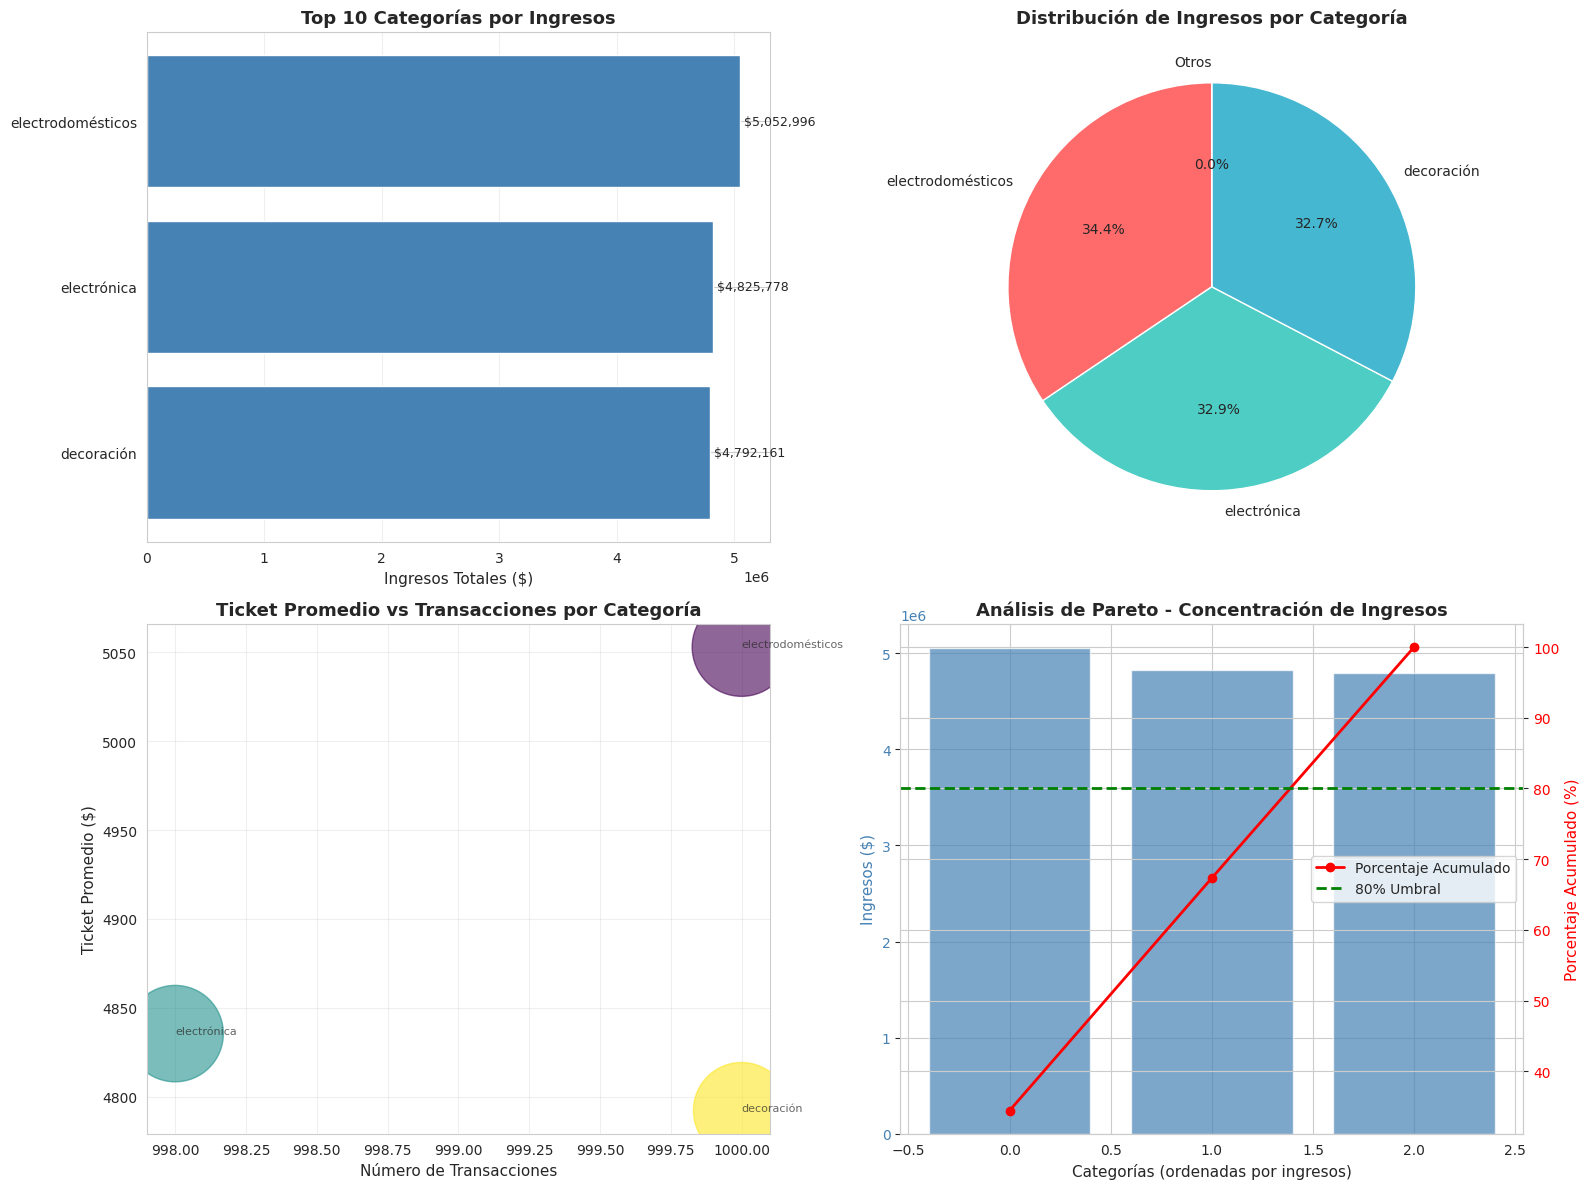

✅ Gráficos generados exitosamente

PASO 9: TABLA RESUMEN FINAL

📋 Tabla Resumen por Categoría:
        categoria  ingresos_totales  porcentaje_ingresos  num_transacciones  ticket_promedio  cantidad_total_vendida  productos_unicos
electrodomésticos         5052996.3            34.442224               1000      5052.996300                 65920.0                10
      electrónica         4825778.0            32.893459                998      4835.448898                 64130.0                10
       decoración         4792160.9            32.664318               1000      4792.160900                 64900.0                10

✅ Tabla guardada en variable: 'ventas_por_categoria'
   Usa esta variable para análisis adicionales

💡 INSIGHTS Y RECOMENDACIONES

🎯 HALLAZGOS CLAVE:

1. CATEGORÍA LÍDER EN INGRESOS
   • electrodomésticos
   • Ingresos: $5,052,996.30 (34.4% del total)
   • Transacciones: 1,000

2. CATEGORÍA CON MEJOR TICKET PROMEDIO
   • electrodomésticos
   • Ticket promedio: $

In [ ]:
# TODO: Resumir las ventas por categoría de producto y analizar los ingresos generados.

print("=" * 60)
print("📊 ANÁLISIS DE VENTAS POR CATEGORÍA DE PRODUCTO")
print("=" * 60)

# Usar el DataFrame limpio y manejar los nulos en precio/cantidad
df_trabajo_categoria = df_limpio.dropna(subset=['precio', 'cantidad']).copy()

# PASO 1: VERIFICAR COLUMNAS NECESARIAS
print("\n" + "-" * 60)
print("PASO 1: VERIFICACIÓN DE COLUMNAS")
print("-" * 60)

# Ajusta los nombres según tu dataset
columna_categoria = 'categoria'
columna_producto = 'producto'
columna_precio = 'precio'
columna_cantidad = 'cantidad'

print(f"Columnas disponibles en el dataset:")
print(list(df_trabajo_categoria.columns))

# Verificar que existan las columnas necesarias
columnas_requeridas = [columna_categoria, columna_precio, columna_cantidad]
columnas_faltantes = [col for col in columnas_requeridas if col not in df_trabajo_categoria.columns]

if columnas_faltantes:
    print(f"\n⚠️  ERROR: Faltan las siguientes columnas: {columnas_faltantes}")
    print(f"   Por favor, ajusta los nombres de las columnas")
else:
    print(f"\n✅ Columnas identificadas correctamente:")
    print(f"   - Categoría: '{columna_categoria}'")
    print(f"   - Precio: '{columna_precio}'")
    print(f"   - Cantidad: '{columna_cantidad}'")

# PASO 2: CALCULAR VENTA TOTAL POR FILA (si no existe)
print("\n" + "-" * 60)
print("PASO 2: CÁLCULO DE VENTAS TOTALES")
print("-" * 60)


df_trabajo_categoria['venta_total'] = df_trabajo_categoria[columna_precio] * df_trabajo_categoria[columna_cantidad]
print("✅ Columna 'venta_total' creada (precio × cantidad)")


print(f"\nEjemplos de cálculo:")
print(df_trabajo_categoria[[columna_categoria, columna_producto, columna_precio, columna_cantidad, 'venta_total']].head())

# PASO 3: RESUMEN DE VENTAS POR CATEGORÍA
print("\n" + "=" * 60)
print("PASO 3: AGRUPACIÓN Y ANÁLISIS POR CATEGORÍA")
print("=" * 60)

# Agrupar por categoría y calcular múltiples métricas
ventas_por_categoria = df_trabajo_categoria.groupby(columna_categoria).agg({
    'venta_total': ['sum', 'mean', 'count', 'max', 'min'],
    columna_cantidad: ['sum', 'mean'],
    columna_precio: ['mean', 'max', 'min'],
    columna_producto: 'nunique'  # Productos únicos por categoría
}).reset_index()

# Aplanar nombres de columnas para mejor legibilidad
ventas_por_categoria.columns = [
    'categoria',
    'ingresos_totales',
    'venta_promedio',
    'num_transacciones',
    'venta_maxima',
    'venta_minima',
    'cantidad_total_vendida',
    'cantidad_promedio_por_venta',
    'precio_promedio',
    'precio_maximo',
    'precio_minimo',
    'productos_unicos'
]

# Ordenar por ingresos totales (descendente)
ventas_por_categoria = ventas_por_categoria.sort_values(
    by='ingresos_totales',
    ascending=False
).reset_index(drop=True)

print("\n📊 Resumen de Ventas por Categoría:")
print(ventas_por_categoria.to_string(index=False))

# PASO 4: ANÁLISIS DETALLADO
print("\n" + "=" * 60)
print("PASO 4: ANÁLISIS DETALLADO POR CATEGORÍA")
print("=" * 60)

# Calcular métricas adicionales
ventas_por_categoria['porcentaje_ingresos'] = (
    ventas_por_categoria['ingresos_totales'] /
    ventas_por_categoria['ingresos_totales'].sum() * 100
)

ventas_por_categoria['porcentaje_transacciones'] = (
    ventas_por_categoria['num_transacciones'] /
    ventas_por_categoria['num_transacciones'].sum() * 100
)

ventas_por_categoria['ticket_promedio'] = (
    ventas_por_categoria['ingresos_totales'] /
    ventas_por_categoria['num_transacciones']
)

# Métricas globales
ingresos_totales_general = ventas_por_categoria['ingresos_totales'].sum()
transacciones_totales = ventas_por_categoria['num_transacciones'].sum()
ticket_promedio_general = ingresos_totales_general / transacciones_totales

print(f"\n💰 MÉTRICAS GLOBALES:")
print(f"   Ingresos totales: ${ingresos_totales_general:,.2f}")
print(f"   Transacciones totales: {transacciones_totales:,.0f}")
print(f"   Ticket promedio general: ${ticket_promedio_general:,.2f}")
print(f"   Cantidad total vendida: {ventas_por_categoria['cantidad_total_vendida'].sum():,.0f} unidades")
print(f"   Categorías activas: {len(ventas_por_categoria)}")

# PASO 5: ANÁLISIS POR CATEGORÍA (TOP 5)
print("\n" + "-" * 60)
print("🏆 TOP 5 CATEGORÍAS POR INGRESOS")
print("-" * 60)

top_5 = ventas_por_categoria.head(5)

for idx, row in top_5.iterrows():
    print(f"\n#{idx+1}. {row['categoria']}")
    print(f"   💵 Ingresos: ${row['ingresos_totales']:,.2f} ({row['porcentaje_ingresos']:.1f}% del total)")
    print(f"   📦 Transacciones: {row['num_transacciones']:,.0f} ({row['porcentaje_transacciones']:.1f}% del total)")
    print(f"   🎯 Ticket promedio: ${row['ticket_promedio']:,.2f}")
    print(f"   📊 Cantidad vendida: {row['cantidad_total_vendida']:,.0f} unidades")
    print(f"   🏷️  Productos únicos: {row['productos_unicos']}")
    print(f"   💲 Precio promedio: ${row['precio_promedio']:,.2f}")
    print(f"   📈 Rango de ventas: ${row['venta_minima']:,.2f} - ${row['venta_maxima']:,.2f}")

# PASO 6: CATEGORÍAS CON BAJO RENDIMIENTO
print("\n" + "-" * 60)
print("⚠️  CATEGORÍAS CON MENOR RENDIMIENTO (BOTTOM 3)")
print("-" * 60)

bottom_3 = ventas_por_categoria.tail(3).sort_values('ingresos_totales', ascending=True)

for idx, row in bottom_3.iterrows():
    print(f"\n{row['categoria']}")
    print(f"   💵 Ingresos: ${row['ingresos_totales']:,.2f} ({row['porcentaje_ingresos']:.1f}% del total)")
    print(f"   📦 Transacciones: {row['num_transacciones']:,.0f}")
    print(f"   🎯 Ticket promedio: ${row['ticket_promedio']:,.2f}")

# PASO 7: ANÁLISIS DE CONCENTRACIÓN (PRINCIPIO DE PARETO)
print("\n" + "=" * 60)
print("📊 ANÁLISIS DE CONCENTRACIÓN (PRINCIPIO 80/20)")
print("=" * 60)

# Calcular contribución acumulada
ventas_por_categoria['ingresos_acumulados'] = ventas_por_categoria['ingresos_totales'].cumsum()
ventas_por_categoria['porcentaje_acumulado'] = (
    ventas_por_categoria['ingresos_acumulados'] /
    ingresos_totales_general * 100
)

# Encontrar cuántas categorías generan el 80% de los ingresos
categorias_80 = ventas_por_categoria[
    ventas_por_categoria['porcentaje_acumulado'] <= 80
]
num_categorias_80 = len(categorias_80) + 1  # +1 para incluir la que supera el 80%

print(f"\n🎯 Análisis de Pareto:")
print(f"   {num_categorias_80} categorías generan el 80% de los ingresos")
print(f"   Esto representa el {(num_categorias_80/len(ventas_por_categoria)*100):.1f}% de las categorías")
print(f"\n   Categorías principales (80% de ingresos):")
for idx, row in ventas_por_categoria.head(num_categorias_80).iterrows():
    print(f"   - {row['categoria']}: ${row['ingresos_totales']:,.2f} ({row['porcentaje_acumulado']:.1f}% acumulado)")

# PASO 8: VISUALIZACIONES
print("\n" + "=" * 60)
print("PASO 8: VISUALIZACIONES")
print("=" * 60)

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Ingresos por Categoría (Barras)
top_10_cat = ventas_por_categoria.head(10)
axes[0, 0].barh(range(len(top_10_cat)), top_10_cat['ingresos_totales'], color='steelblue')
axes[0, 0].set_yticks(range(len(top_10_cat)))
axes[0, 0].set_yticklabels(top_10_cat['categoria'], fontsize=10)
axes[0, 0].set_xlabel('Ingresos Totales ($)', fontsize=11)
axes[0, 0].set_title('Top 10 Categorías por Ingresos', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].invert_yaxis()

# Añadir valores en las barras
for i, (idx, row) in enumerate(top_10_cat.iterrows()):
    axes[0, 0].text(row['ingresos_totales'], i, f" ${row['ingresos_totales']:,.0f}",
                    va='center', fontsize=9)

# Gráfico 2: Distribución Porcentual (Pie Chart)
top_5_pie = ventas_por_categoria.head(5)
otros_ingresos = ventas_por_categoria.iloc[5:]['ingresos_totales'].sum()

valores_pie = list(top_5_pie['ingresos_totales']) + [otros_ingresos]
labels_pie = list(top_5_pie['categoria']) + ['Otros']
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#ffeaa7', '#dfe6e9']

axes[0, 1].pie(valores_pie, labels=labels_pie, colors=colors, autopct='%1.1f%%',
               startangle=90, textprops={'fontsize': 10})
axes[0, 1].set_title('Distribución de Ingresos por Categoría', fontsize=13, fontweight='bold')

# Gráfico 3: Ticket Promedio vs Número de Transacciones
axes[1, 0].scatter(ventas_por_categoria['num_transacciones'],
                   ventas_por_categoria['ticket_promedio'],
                   s=ventas_por_categoria['ingresos_totales']/1000,  # Tamaño según ingresos
                   alpha=0.6, c=range(len(ventas_por_categoria)), cmap='viridis')
axes[1, 0].set_xlabel('Número de Transacciones', fontsize=11)
axes[1, 0].set_ylabel('Ticket Promedio ($)', fontsize=11)
axes[1, 0].set_title('Ticket Promedio vs Transacciones por Categoría', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Añadir etiquetas a las categorías principales
for idx, row in top_5_pie.iterrows():
    axes[1, 0].annotate(row['categoria'],
                       (row['num_transacciones'], row['ticket_promedio']),
                       fontsize=8, alpha=0.7)

# Gráfico 4: Curva de Pareto (80/20)
axes[1, 1].bar(range(len(ventas_por_categoria)),
               ventas_por_categoria['ingresos_totales'],
               color='steelblue', alpha=0.7, label='Ingresos')
ax2 = axes[1, 1].twinx()
ax2.plot(range(len(ventas_por_categoria)),
         ventas_por_categoria['porcentaje_acumulado'],
         color='red', marker='o', linewidth=2, label='Porcentaje Acumulado')
ax2.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80% Umbral')

axes[1, 1].set_xlabel('Categorías (ordenadas por ingresos)', fontsize=11)
axes[1, 1].set_ylabel('Ingresos ($)', fontsize=11, color='steelblue')
ax2.set_ylabel('Porcentaje Acumulado (%)', fontsize=11, color='red')
axes[1, 1].set_title('Análisis de Pareto - Concentración de Ingresos', fontsize=13, fontweight='bold')
axes[1, 1].tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='center right')

plt.tight_layout()
plt.show()

print("✅ Gráficos generados exitosamente")

# PASO 9: EXPORTAR TABLA RESUMEN
print("\n" + "=" * 60)
print("PASO 9: TABLA RESUMEN FINAL")
print("=" * 60)

# Crear tabla resumen con las columnas más importantes
resumen_final = ventas_por_categoria[[
    'categoria',
    'ingresos_totales',
    'porcentaje_ingresos',
    'num_transacciones',
    'ticket_promedio',
    'cantidad_total_vendida',
    'productos_unicos'
]].copy()

print("\n📋 Tabla Resumen por Categoría:")
print(resumen_final.to_string(index=False))

# Guardar en variable para uso posterior
print(f"\n✅ Tabla guardada en variable: 'ventas_por_categoria'")
print(f"   Usa esta variable para análisis adicionales")

# Opcional: Exportar a CSV
# ventas_por_categoria.to_csv('ventas_por_categoria.csv', index=False)
# print("✅ Tabla exportada a 'ventas_por_categoria.csv'")

# PASO 10: INSIGHTS Y RECOMENDACIONES
print("\n" + "=" * 60)
print("💡 INSIGHTS Y RECOMENDACIONES")
print("=" * 60)

# Categoría líder
cat_lider = ventas_por_categoria.iloc[0]
# Categoría con mejor ticket promedio
cat_mejor_ticket = ventas_por_categoria.loc[ventas_por_categoria['ticket_promedio'].idxmax()]
# Categoría con más productos
cat_mas_productos = ventas_por_categoria.loc[ventas_por_categoria['productos_unicos'].idxmax()]

print(f"""
🎯 HALLAZGOS CLAVE:

1. CATEGORÍA LÍDER EN INGRESOS
   • {cat_lider['categoria']}
   • Ingresos: ${cat_lider['ingresos_totales']:,.2f} ({cat_lider['porcentaje_ingresos']:.1f}% del total)
   • Transacciones: {cat_lider['num_transacciones']:,.0f}

2. CATEGORÍA CON MEJOR TICKET PROMEDIO
   • {cat_mejor_ticket['categoria']}
   • Ticket promedio: ${cat_mejor_ticket['ticket_promedio']:,.2f}
   • Ingresos totales: ${cat_mejor_ticket['ingresos_totales']:,.2f}

3. CATEGORÍA MÁS DIVERSIFICADA
   • {cat_mas_productos['categoria']}
   • Productos únicos: {cat_mas_productos['productos_unicos']}
   • Ingresos: ${cat_mas_productos['ingresos_totales']:,.2f}

4. CONCENTRACIÓN DE MERCADO
   • {num_categorias_80} categorías generan el 80% de los ingresos
   • Alta concentración = enfocar recursos en categorías principales


""")

print("=" * 60)
print("✅ Análisis completado exitosamente")
print("=" * 60)

In [ ]:
# Aplicar la función de limpieza a df_ventas
df_ventas_limpio, resumen_ventas = limpiar_dataset(
    df_ventas.copy(),  # Usar una copia para no modificar el original directamente
    eliminar_duplicados=True,
    columnas_numericas_a_limpiar={'precio': ['$', ','], 'cantidad': ['[^0-9.]']}, # Limpiar $ y cualquier caracter no numerico en precio, y no numerico en cantidad
    normalizacion_texto='title' # Normalizar texto a formato título
)

# Mostrar el resumen de la limpieza
print("\n" + "=" * 60)
print("RESUMEN DE LIMPIEZA - df_ventas")
print("=" * 60)
print(resumen_ventas)


------------------------------------------------------------
INICIO DE LIMPIEZA DEL DATASET
------------------------------------------------------------

Eliminando 35 filas duplicadas al inicio...
✅ Duplicados eliminados

------------------------------------------------------------
PASO 3: LIMPIEZA DE COLUMNAS DE TEXTO
------------------------------------------------------------

Columnas de texto encontradas: 4
Columnas: ['producto', 'precio', 'fecha_venta', 'categoria']

🔍 Limpiando columna: 'producto'
   Ejemplos antes: ['Cuadro decorativo', 'Lámpara de mesa', 'Secadora']
   Ejemplos después: ['Cuadro Decorativo', 'Lámpara De Mesa', 'Secadora']
   ✅ Limpieza completada

🔍 Limpiando columna: 'precio'
   Ejemplos antes: ['$69.94', '$105.10', '$97.96']
   Ejemplos después: ['69.94', '105.10', '97.96']
   ✅ Limpieza completada

🔍 Limpiando columna: 'fecha_venta'
   Ejemplos antes: ['02/01/2024', '02/01/2024', '02/01/2024']
   Ejemplos después: ['02012024', '02012024', '02012024']
   ✅